# Assignment-11-Text Mining-01-Elon Musk

1) Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

In [52]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

## Emotion Mining - Sentiment Analysis

In [53]:
# load the dataset
elontweets=pd.read_csv('Elon_musk.csv',encoding='Latin-1')
elontweets.drop(['Unnamed: 0'],inplace=True,axis=1)
elontweets

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [54]:
elontweets.shape

(1999, 1)

In [59]:
sentiment_data=pd.DataFrame(elontweets,columns=['Text'])
sentiment_data

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [55]:
# Emotion Lexicon - Affin
affin=pd.read_csv('Afinn.csv',sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [51]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [72]:
affinity_scores['fun']

4

In [56]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [57]:
# manual testing
calculate_sentiment(text='great')

3

In [60]:
# Calculating sentiment value for each sentence
sentiment_data['sentiment_value']=elontweets['Text'].apply(calculate_sentiment)
sentiment_data

,Text,sentiment_value
0,@kunalb11 Im an alien,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,0
2,@joerogan @Spotify Great interview!,3
3,@gtera27 Doge is underestimated,-1
4,@teslacn Congratulations Tesla China for amazi...,4
...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...",-3
1995,@PPathole Make sure to read ur terms &amp; con...,1
1996,@TeslaGong @PPathole Samwise Gamgee,0
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,0


In [61]:
# how many words are there in a sentence?
sentiment_data['word_count']=sentiment_data['Text'].str.split().apply(len)
sentiment_data

,Text,sentiment_value,word_count
0,@kunalb11 Im an alien,0,4
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,0,13
2,@joerogan @Spotify Great interview!,3,4
3,@gtera27 Doge is underestimated,-1,4
4,@teslacn Congratulations Tesla China for amazi...,4,17
...,...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...",-3,23
1995,@PPathole Make sure to read ur terms &amp; con...,1,12
1996,@TeslaGong @PPathole Samwise Gamgee,0,4
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,0,7


In [63]:
sentiment_data.sort_values(by='word_count')

,Text,sentiment_value,word_count
1482,<U+0001F40D><U+0001F3B7>,0,1
933,@IEEEorg,0,1
444,https://t.co/EbOjGshvrq,0,1
179,https://t.co/gpcvjIBTLM,0,1
1918,Thanks,2,1
...,...,...,...
1228,RT @CARandDRIVER: We drove a Model S Long Rang...,0,26
681,RT @NASA: <U+0001F409> Enter the Crew Dragon. ...,0,27
145,u cant sell houses u dont own\nu cant sell ...,0,28
1031,RT @MotorTrend: We put the 2020 @Tesla Model Y...,0,28


In [64]:
# Sentiment score of the whole review
sentiment_data['sentiment_value'].describe()

count    1999.000000
mean        0.637819
std         1.728258
min        -7.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        12.000000
Name: sentiment_value, dtype: float64

In [67]:
# negative sentiment score of the whole review
sentiment_data[sentiment_data['sentiment_value']<0]

,Text,sentiment_value,word_count
3,@gtera27 Doge is underestimated,-1,4
6,"Frodo was the underdoge,\nAll thought he would...",-2,14
15,"@JoshManMode He definitely has issues, but the...",-2,12
20,@freewalletorg Any crypto wallet that wont gi...,-1,17
21,@freewalletorg Your app sucks,-3,4
...,...,...,...
1975,@RationalEtienne @flcnhvy @PPathole @IheartTes...,-3,10
1976,@thatt3slaguy @flcnhvy @PPathole @IheartTesla ...,-1,16
1990,"@kenyanwalstreet Not actually a payout, just a...",-1,22
1991,@IheartTesla No easy way to answer this in a t...,-3,23


In [66]:
# positive sentiment score of the whole review
sentiment_data[sentiment_data['sentiment_value']>0]

,Text,sentiment_value,word_count
2,@joerogan @Spotify Great interview!,3,4
4,@teslacn Congratulations Tesla China for amazi...,4,17
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),2,6
9,The most entertaining outcome is the most likely,2,8
11,Just agree to do Clubhouse with @kanyewest,1,7
...,...,...,...
1987,@PPathole @IheartTesla For sure. This is both ...,3,19
1988,@redmercy Yes,1,2
1989,"@buzzindelhi Sorry, should hopefully be soon!",1,6
1995,@PPathole Make sure to read ur terms &amp; con...,1,12


In [68]:
# Adding index cloumn
sentiment_data['index']=range(0,len(sentiment_data))
sentiment_data

,Text,sentiment_value,word_count,index
0,@kunalb11 Im an alien,0,4,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,0,13,1
2,@joerogan @Spotify Great interview!,3,4,2
3,@gtera27 Doge is underestimated,-1,4,3
4,@teslacn Congratulations Tesla China for amazi...,4,17,4
...,...,...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...",-3,23,1994
1995,@PPathole Make sure to read ur terms &amp; con...,1,12,1995
1996,@TeslaGong @PPathole Samwise Gamgee,0,4,1996
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,0,7,1997


<ipython-input-69-eac0a090ac4c>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sentiment_data['sentiment_value'])


<Axes: xlabel='sentiment_value', ylabel='Density'>

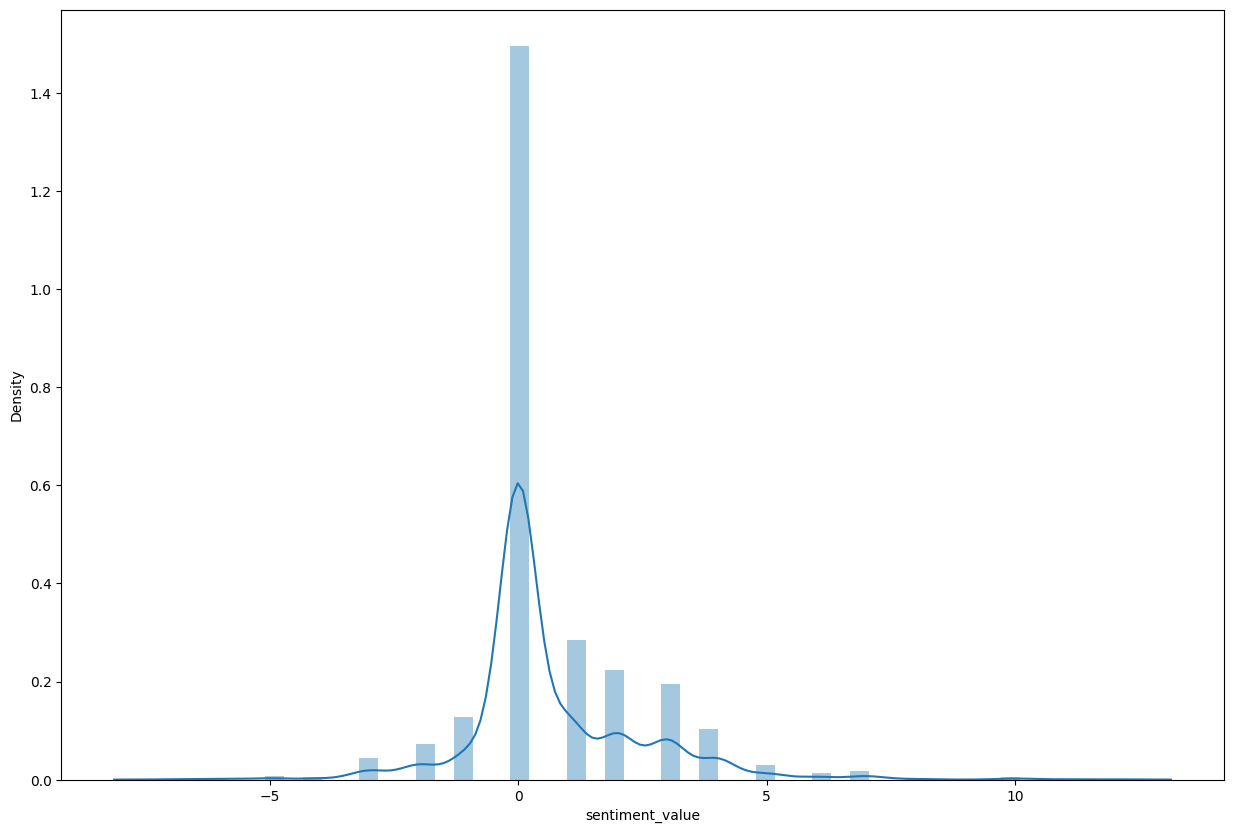

In [69]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sentiment_data['sentiment_value'])

<Axes: xlabel='index', ylabel='sentiment_value'>

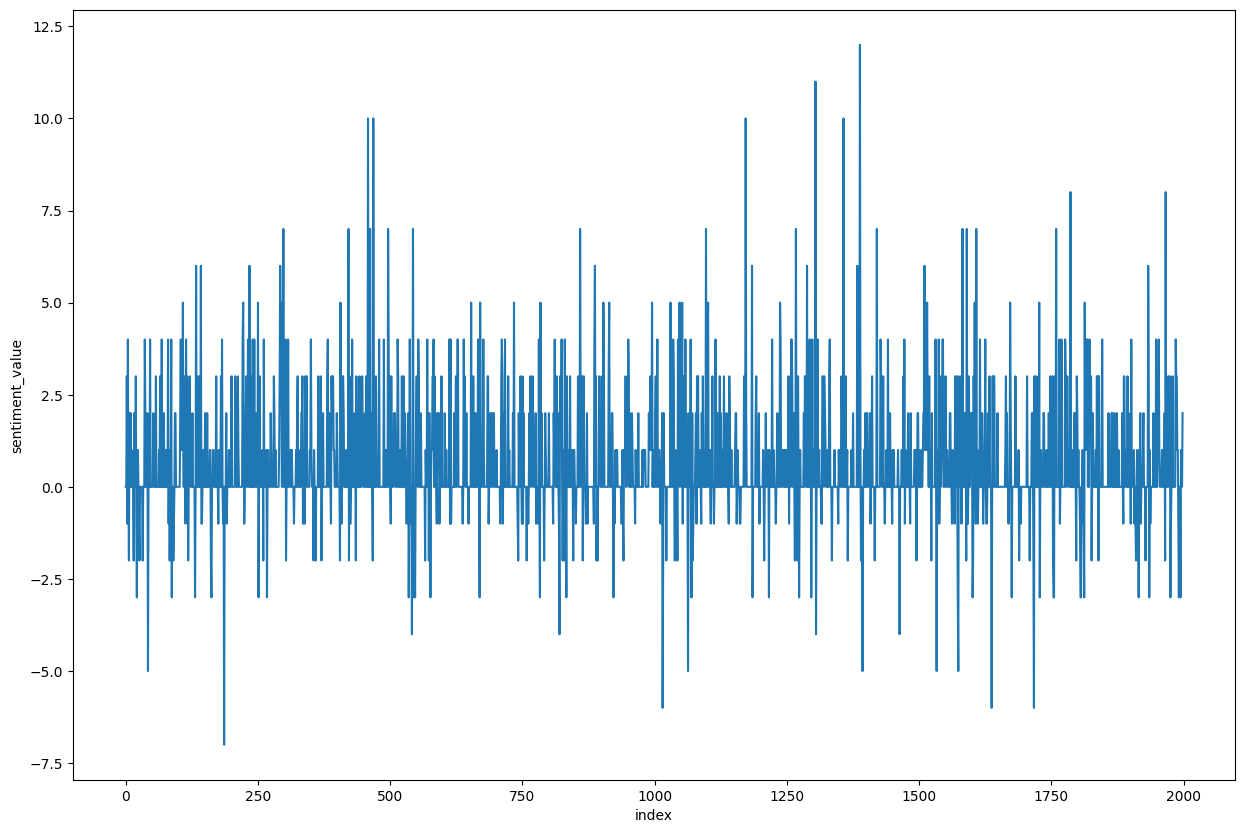

In [71]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sentiment_data)

<Axes: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

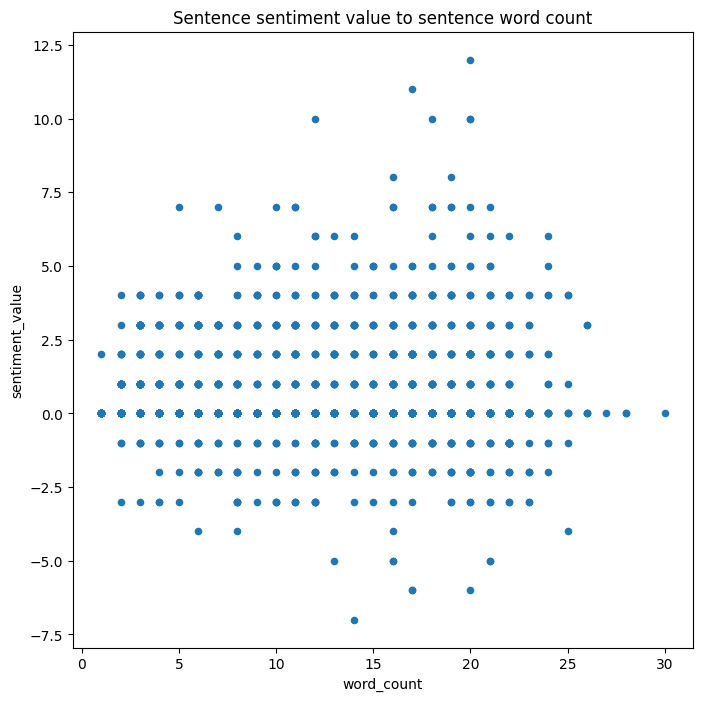

In [70]:
# Correlation analysis
sentiment_data.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='Sentence sentiment value to sentence word count')